In [22]:
from qiskit import QuantumRegister,ClassicalRegister,QuantumCircuit,execute,Aer,assemble
from qiskit.ignis.mitigation.measurement import CompleteMeasFitter,complete_meas_cal

In [11]:
q = QuantumRegister(3,'q')
c = ClassicalRegister(3,'c')

In [12]:
circuit = QuantumCircuit(q,c)

In [13]:
circuit.h(0)
circuit.cx(0,1)
circuit.cx(0,2)
circuit.measure([0,1,2],[0,1,2])

In [14]:
backend = Aer.get_backend('qasm_simulator')

In [15]:
job = execute(circuit,backend,shots=1000)
counts = job.result().get_counts()

In [16]:
counts

{'000': 503, '111': 497}

In [17]:
circuit.draw()

┌───┐             ┌─┐   
q_0: ┤ H ├──■────■─────┤M├───
     └───┘┌─┴─┐  │  ┌─┐└╥┘   
q_1: ─────┤ X ├──┼──┤M├─╫────
          └───┘┌─┴─┐└╥┘ ║ ┌─┐
q_2: ──────────┤ X ├─╫──╫─┤M├
               └───┘ ║  ║ └╥┘
c: 3/════════════════╩══╩══╩═
                     1  0  2

In [19]:
qubit_list = [0,1,2]
calibaration_circuit,state_labels = complete_meas_cal(qubit_list=qubit_list)

In [23]:
compiled_calibaration = assemble(calibaration_circuit)

In [26]:
cal_job = backend.run(compiled_calibaration,shots=1000)
cal_result = cal_job.result()

C:\Users\sanja\AppData\Local\Temp\ipykernel_3392\3958707050.py:1: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  cal_job = backend.run(compiled_calibaration,shots=1000)


In [30]:
meas_fitter = CompleteMeasFitter(cal_result,state_labels)
mitigated_counts = meas_fitter.filter.apply(counts)

In [32]:
print('Original Count:',counts)

Original Count: {'000': 503, '111': 497}


In [33]:
print('Mitigated Count:',mitigated_counts)

Mitigated Count: {'000': 502.99999982927636, '101': 1.1103854631544175e-16, '110': 1.1103854631544175e-16, '111': 497.0000001791843}


In [48]:
# Run the calibration circuit and get the results
cal_job = backend.run(compiled_calibaration, shots=1)
cal_result = cal_job.result()

# Create a CompleteMeasFitter using the calibration data
meas_fitter = CompleteMeasFitter(cal_result, state_labels)

# Mitigate the measurement error in the original counts
mitigated_counts = meas_fitter.filter.apply(counts)


C:\Users\sanja\AppData\Local\Temp\ipykernel_3392\2320434104.py:2: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  cal_job = backend.run(compiled_calibaration, shots=1)


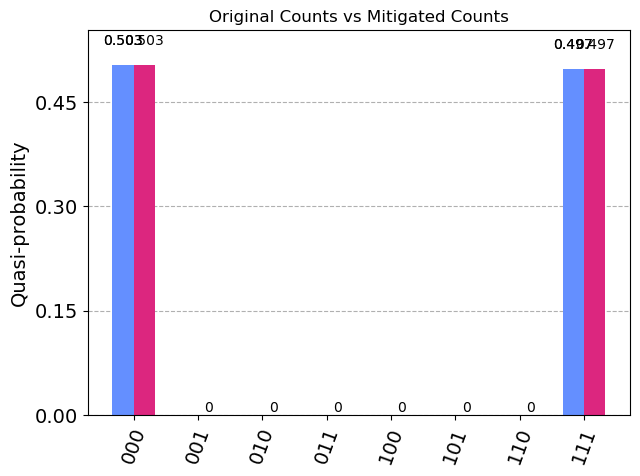

In [52]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)
plot_histogram([counts,mitigated_counts], title="Original Counts vs Mitigated Counts")
